<a href="https://colab.research.google.com/github/lillybethw/DS1002/blob/main/Assignments/Lab_FTX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS1002 Lab 1:  FTX

### Due Monday 1 April at noon

In this lab you will work with a dataset, writing python to generate the deliverables specified in the cells below.

> **FTX** was a cryptocurrency exchange founded by Sam Bankman-Fried that saw both a spectacular rise and collapse between 2021 and 2022. At one point it had a valuation of $32B. In November Bankman-Fried was found guilty on seven counts of fraud and conspiracy.  His sentencing hearing is today.

The dataset for this assignment covers that rise and fall from the viewpoint of daily stock closing prices for FTX (ticker symbol `FTT`).

Answer the questions below with the appropriate Python code.

**Put code and outputs in this notebook.**


## Group Submissions

As usual you may work in a group to complete this lab, with no more than 3 members in a group. Group members should be indicated in the cell below -- list both names and UVA computing IDs.

Each student should then submit **the same URL** for the lab in Canvas. (If a group has Member1, Member2, and Member3, only one member needs to save the completed work back to GitHub and all members should submit that URL for grading.)

In [ ]:
# List group members (if applicable). Identify names and computing IDs
#
# Name                    Computing ID

## 1. Load Libraries & Data

https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv

Import any necessary libraries and load the remote CSV file below into a DataFrame. **Resolve any import issues you need to.**

In [45]:
import pandas as pd
ftx = pd.read_csv('https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv')

## 2. Get Summary Data

In code, display how many rows and columns are in the raw dataset.

In [46]:
ftx.shape

(741, 1)

## 3. Clean and Organize the Data

Check for data quality.

- Resolve any empty values or duplicate rows.
- Order the data properly if necessary.
- Drop the following columns and save the dataframe: `timeOpen`, `timeClose`, `timeHigh`, `timeLow`, `marketCap`



In [47]:
ftx.head(3)

,timeOpen;timeClose;timeHigh;timeLow;open;high;low;close;volume;marketCap;timestamp
0,"2022-12-31T00:00:00.000Z;""2022-12-31T23:59:59...."
1,"2022-12-30T00:00:00.000Z;""2022-12-30T23:59:59...."
2,"2022-12-29T00:00:00.000Z;""2022-12-29T23:59:59...."


In [48]:
#split values into columns
ftx_split = ftx['timeOpen;timeClose;timeHigh;timeLow;open;high;low;close;volume;marketCap;timestamp'].str.split(';', expand=True)
# make new column names
ftx_split.columns = ftx.columns[0].split(';')
# join split df and original df
ftx = pd.concat([ftx,ftx_split], axis=1)
# drop messy column and other specified columns
ftx.drop(columns=['timeOpen;timeClose;timeHigh;timeLow;open;high;low;close;volume;marketCap;timestamp', 'timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'marketCap'], inplace=True)
# drop duplicates
ftx.drop_duplicates(inplace=True)
# drop columns with missing values
ftx.dropna(inplace=True)
# sort chronologically
ftx.sort_values('timestamp', inplace=True)
# reset and drop old index
ftx.reset_index(drop=True, inplace=True)

In [55]:
#clean timestamp column
from datetime import datetime

ftx['timestamp'] = ftx['timestamp'].str.strip('"')

def clean_date(timestamp_val):
  return datetime.strptime(timestamp_val,"%Y-%m-%dT%H:%M:%S.%fZ")
ftx['timestamp'] = ftx['timestamp'].apply(clean_date)

Now display the first 10 rows of the cleaned dataset.

In [56]:
ftx.head(10)

,open,high,low,close,volume,timestamp
0,6.20113267,7.00752345,6.171834,6.92396831,31046652.87,2021-01-03 23:59:59.999
1,6.94867983,7.63214646,6.35821845,7.51407925,40526109.15,2021-01-04 23:59:59.999
2,7.52821638,8.71494656,7.08112034,8.66468773,49479278.39,2021-01-05 23:59:59.999
3,8.67128533,9.39079731,8.4259458,9.39079731,31404627.93,2021-01-06 23:59:59.999
4,9.386493,10.00487172,9.21524402,9.56213089,46303336.73,2021-01-07 23:59:59.999
5,9.56923877,9.72642922,8.45226488,9.38098835,42286267.89,2021-01-08 23:59:59.999
6,9.37044999,9.63612025,8.72804429,9.57051061,28498948.68,2021-01-09 23:59:59.999
7,9.57191738,9.94479719,8.6571467,9.30880934,31012393.14,2021-01-10 23:59:59.999
8,9.2983155,9.2983155,7.12604974,8.61099653,101302369.57,2021-01-11 23:59:59.999
9,8.6151428,9.09747943,8.04091578,8.38113312,26745357.03,2021-01-12 23:59:59.999


## 4. Calculate Daily Gains/Losses

Using Pandas, add a new column named `["close_change"]` to the dataframe that calculates the difference between daily closing prices for FTX. This will result in positive (growth) and negative (loss) values.

Note:
- Be careful about how you calculate this. Each row should calculate that difference from the row above it, which must be the previous calendar day.
- Hint: This is not complicated and does not require a for-loop.  See the Pandas review notebook for reference.

In [57]:
ftx['close'] = pd.to_numeric(ftx['close'])
ftx['close_change'] = ftx['close'].diff()
ftx.head(5)

,open,high,low,close,volume,timestamp,close_change
0,6.20113267,7.00752345,6.171834,6.923968,31046652.87,2021-01-03 23:59:59.999,NaN
1,6.94867983,7.63214646,6.35821845,7.514079,40526109.15,2021-01-04 23:59:59.999,0.590111
2,7.52821638,8.71494656,7.08112034,8.664688,49479278.39,2021-01-05 23:59:59.999,1.150608
3,8.67128533,9.39079731,8.4259458,9.390797,31404627.93,2021-01-06 23:59:59.999,0.726110
4,9.386493,10.00487172,9.21524402,9.562131,46303336.73,2021-01-07 23:59:59.999,0.171334


## 5. Identify Growth Days

Based on the daily change in closing prices calculated above, identify the top 10 days of positive growth for FTX.

Display your results in a table showing both the rate of change and their dates.

In [58]:
# sort close_change in descending order
ftx_top_sorted = ftx.sort_values('close_change', ascending=False)
# take rows with top 10 values
ftx_top10 = ftx_top_sorted.iloc[0:10]
# make new df with only close_change and timestamp columns
positive_ftx = ftx_top10[['close_change', 'timestamp']].copy()
#reset index
positive_ftx.reset_index(drop=True, inplace=True)
positive_ftx

,close_change,timestamp
0,16.677156,2021-09-01 23:59:59.999
1,9.800320,2021-09-06 23:59:59.999
2,8.335900,2021-02-19 23:59:59.999
3,6.333923,2021-05-24 23:59:59.999
4,5.529699,2021-03-09 23:59:59.999
5,5.325192,2021-08-09 23:59:59.999
6,5.239728,2021-09-08 23:59:59.999
7,4.504385,2021-04-26 23:59:59.999
8,4.488174,2021-05-05 23:59:59.999
9,4.401841,2022-02-28 23:59:59.999


## 6. Calculate the Percentage Rate of Change

Next, create a new column named `["rate_of_change"]` based on `["close_change"]`.

Use the Pandas Review notebook for reference. Again, this is an easy operation in Pandas and does not require a for-loop.

In [59]:
ftx['rate_of_change'] = ftx['close'].pct_change()
#drop first row since it contains NaN
ftx.drop(ftx.index[0], inplace=True)
ftx.head(5)

,open,high,low,close,volume,timestamp,close_change,rate_of_change
1,6.94867983,7.63214646,6.35821845,7.514079,40526109.15,2021-01-04 23:59:59.999,0.590111,0.085227
2,7.52821638,8.71494656,7.08112034,8.664688,49479278.39,2021-01-05 23:59:59.999,1.150608,0.153127
3,8.67128533,9.39079731,8.4259458,9.390797,31404627.93,2021-01-06 23:59:59.999,0.726110,0.083801
4,9.386493,10.00487172,9.21524402,9.562131,46303336.73,2021-01-07 23:59:59.999,0.171334,0.018245
5,9.56923877,9.72642922,8.45226488,9.380988,42286267.89,2021-01-08 23:59:59.999,-0.181143,-0.018944


## 7. Identify Days of Greatest Percentage Change

Based on the rate change column calculated above, identify the top 5 days of greatest positive rate change, and the top 5 days of greatest negative rate change.

Display your results in a table showing both the rate of change and their dates.

In [60]:
ftx_change_sorted = ftx.sort_values('rate_of_change', ascending=False)
ftx_top5_pos = ftx_change_sorted.head(5).drop(columns= ['open', 'high', 'low', 'close', 'volume', 'close_change'])
ftx_top5_neg = ftx_change_sorted.tail(5).drop(columns= ['open', 'high', 'low', 'close', 'volume', 'close_change'])
print('---top 5 days of greatest positive rate change---')
print(ftx_top5_pos)
print('---top 5 days of greatest negative rate change---' )
print(ftx_top5_neg)

---top 5 days of greatest positive rate change---
                  timestamp  rate_of_change
675 2022-11-10 23:59:59.999        0.528686
241 2021-09-01 23:59:59.999        0.343825
47  2021-02-19 23:59:59.999        0.317665
704 2022-12-09 23:59:59.999        0.246848
680 2022-11-15 23:59:59.999        0.244886
---top 5 days of greatest negative rate change---
                  timestamp  rate_of_change
676 2022-11-11 23:59:59.999       -0.263444
136 2021-05-19 23:59:59.999       -0.275101
678 2022-11-13 23:59:59.999       -0.287059
674 2022-11-09 23:59:59.999       -0.583137
673 2022-11-08 23:59:59.999       -0.750752


## 8. Plot the Data

Create two separate plots of the data -- one for the daily closing price and one for the daily gains/losses. These can be histograms or line plots.

Text(0.5, 1.0, 'FTX Daily Closing Price')

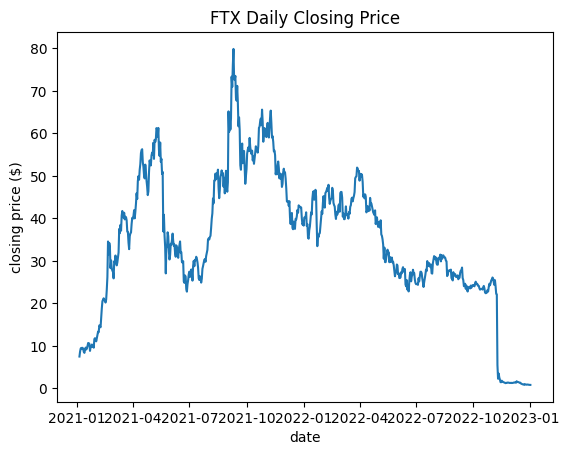

In [77]:
import matplotlib.pyplot as plt
closes_plot = plt.plot(ftx['timestamp'], ftx['close'])
plt.xlabel('date')
plt.ylabel('closing price ($)')
plt.title('FTX Daily Closing Price')

Text(0.5, 1.0, 'FTX Daily Gains and Losses')

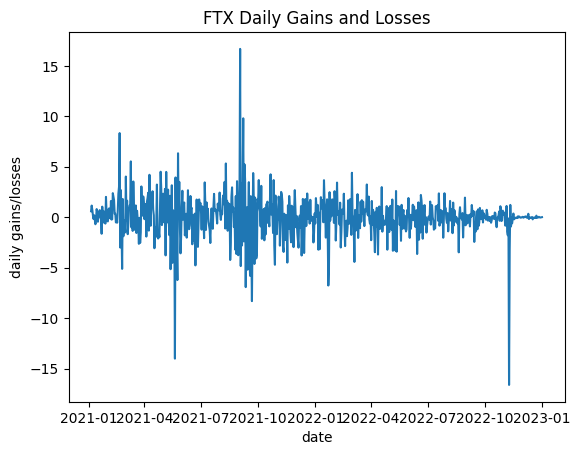

In [78]:
change_plot = plt.plot(ftx['timestamp'], ftx['close_change'])
plt.xlabel('date')
plt.ylabel('daily gains/losses')
plt.title('FTX Daily Gains and Losses')

Combine the two plots from above into a single plot, displaying both together. Your plot should have two Y-axis scales, should differentiate the two values by color, and should include a legend.

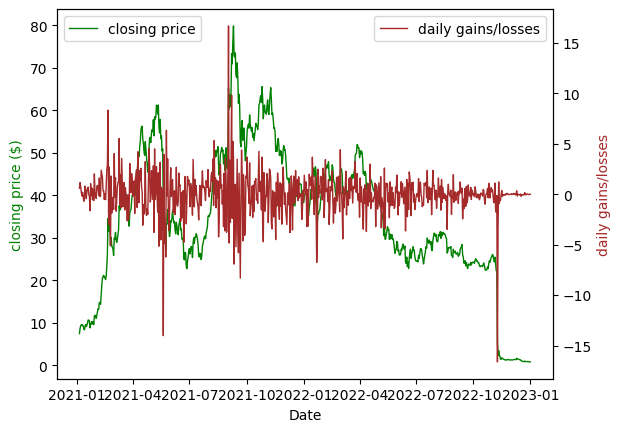

In [92]:
#define variables
x = ftx['timestamp']
y1 = ftx['close']
y2 = ftx['close_change']
#make subplot
fig, ax1 = plt.subplots()
#make second y axis and plot lines
ax2 = ax1.twinx()
ax1.plot(x, y1, color='green', linewidth=1, label='closing price')
ax2.plot(x, y2, color='brown', linewidth=1, label='daily gains/losses')
# labels and titles
ax1.set_ylabel('closing price ($)', color='green')
ax2.set_ylabel('daily gains/losses', color='brown')
ax1.set_xlabel('Date')
# make legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')